In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('C:/Users/ALISHBA JAWED/Desktop/Customer Churn Prediction/telecom_churn.csv')

In [3]:
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB
   Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2     

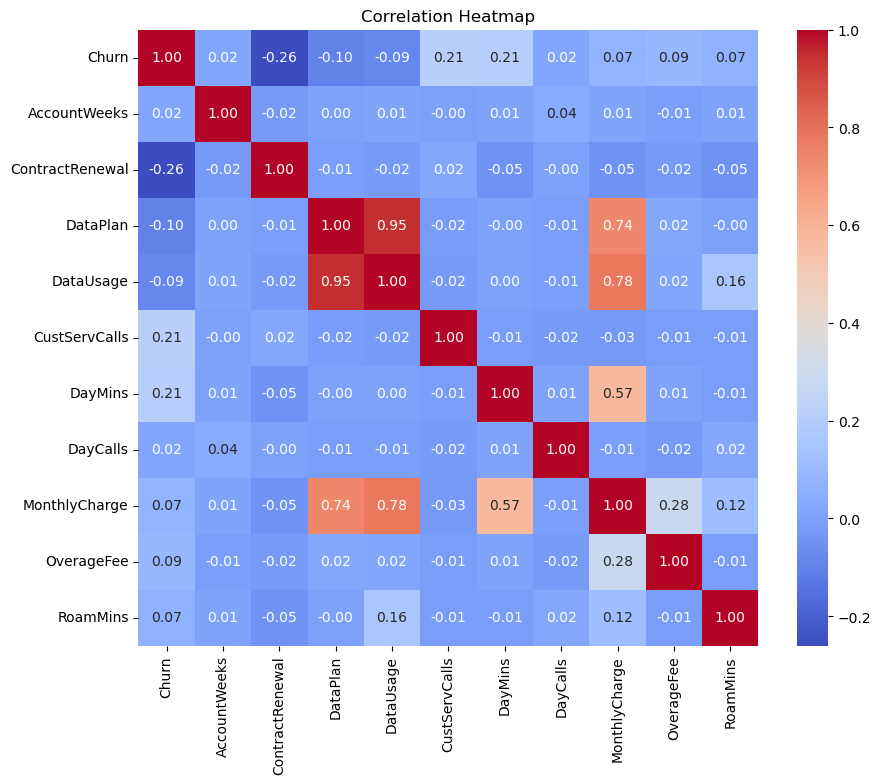

In [4]:
#Correlation Heatmap - EDA
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

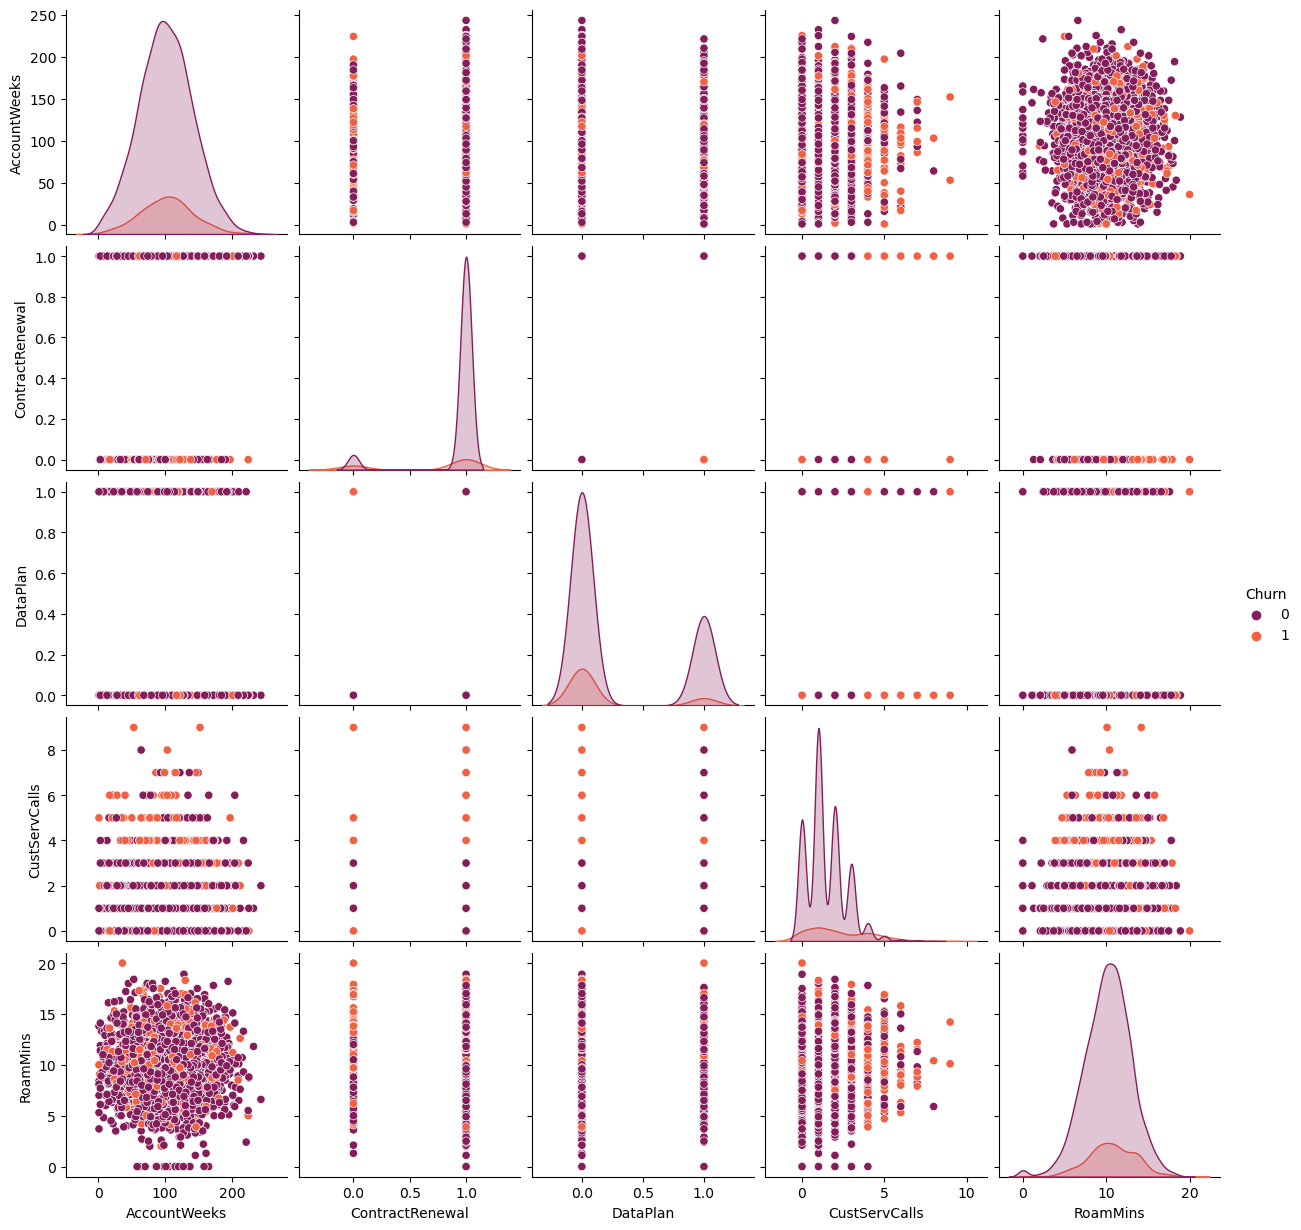

In [15]:
#Pairplots - EDA
selected_columns = ['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'CustServCalls', 'RoamMins']
sns.pairplot(df[selected_columns], hue="Churn", palette="rocket")
plt.show()

In [17]:
#Data Preprocessing
X = df.drop('Churn', axis=1)
y = df['Churn']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80/20

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
#Model Training
#1. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [21]:
#Model Training
#2. Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)

In [24]:
#Model Evaluation
#1. LR
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_log_reg)}\n")

#2. RF
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf_clf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_clf):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf_clf)}\n")

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.62      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.75      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

Accuracy: 0.8591
Confusion Matrix:
[[555  11]
 [ 83  18]]

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.86      0.61      0.72       101

    accuracy                           0.93       667
   macro avg       0.90      0.80      0.84       667
weighted avg       0.92      0.93      0.92       667

Accuracy: 0.9265
Confusion Matrix:
[[556  10]
 [ 39  62]]



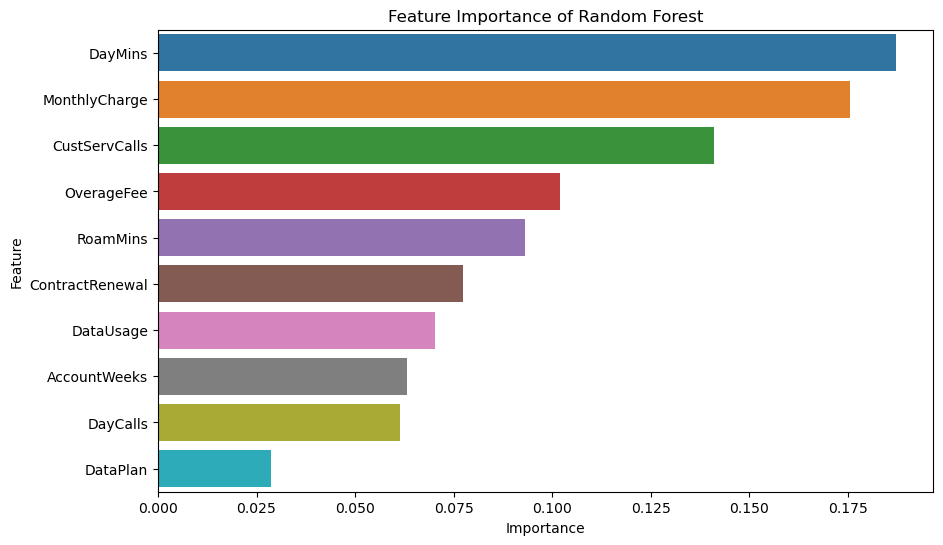

In [25]:
importances = rf_clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
#this step is to visualise which features are important for RF Classifier

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance of Random Forest')
plt.show()

In [26]:
#predict
predictions = pd.DataFrame({
    'Actual': y_test,
    'Logistic Regression Prediction': y_pred_log_reg,
    'Random Forest Prediction': y_pred_rf_clf
})
print(predictions.head())

      Actual  Logistic Regression Prediction  Random Forest Prediction
438        0                               0                         0
2674       0                               0                         0
1345       1                               0                         1
1957       0                               0                         0
2148       0                               0                         0
